In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import (rc_context, rcParams, patches, 
            patheffects as path_effects)
import sunpy
import sunpy.map
from sunpy.coordinates import propagate_with_solar_surface
from astropy.coordinates import SkyCoord
import astropy.constants as const
import astropy.units as u
from astropy.visualization import ImageNormalize, AsinhStretch
from glob import glob
from watroo import wow
from fancy_colorbar import plot_colorbar, wcs_scalebar

In [2]:
ms_style_dict = {'text.usetex': True, 'font.family': 'serif', 'axes.linewidth': 1.2,
                 'xtick.major.width': 1.2, 'xtick.major.size': 4,
                 'ytick.major.width': 1.2, 'ytick.major.size': 4,
                 'xtick.minor.width': 1.2, 'xtick.minor.size': 2,
                 'ytick.minor.width': 1.2, 'ytick.minor.size': 2,
                 'xtick.direction': 'in', 'ytick.direction': 'in',
                 'text.latex.preamble': r'\usepackage[T1]{fontenc}'
                 r'\usepackage{amsmath}' r'\usepackage{siunitx}'
                 r'\sisetup{detect-all=True}'}
rcParams.update(ms_style_dict)

In [3]:
hri_maps_1024 = sorted(glob('../../src/EUI/HRI/euv174/20221024/coalign_step_boxcar/*.fits'))
hri_map_1024 = sunpy.map.Map(hri_maps_1024[181])
Txshift_hri_1024, Tyshift_hri_1024 = (1.66986 + 2.49223)*u.arcsec,(7.60204 - 2.76366 )*u.arcsec
hri_map_1024 = hri_map_1024.shift_reference_coord(Txshift_hri_1024, Tyshift_hri_1024)
hri_map_1024 = hri_map_1024.submap([300,200]*u.pix, top_right=[2000,1900]*u.pix)

In [4]:
hri_map_1024_wow = sunpy.map.Map(wow(hri_map_1024.data, bilateral=1, denoise_coefficients=[5,3])[0], 
                                 hri_map_1024.meta)
hri_map_1024_wow_zoomin = hri_map_1024_wow.submap([210,140]*u.pix, top_right=[520,600]*u.pix)
hri_map_1024_wow_zoomin_region_1 = hri_map_1024_wow.submap([210,400]*u.pix, top_right=[370,560]*u.pix)
hri_map_1024_wow_zoomin_region_2 = hri_map_1024_wow.submap([230,200]*u.pix, top_right=[430,400]*u.pix)

In [5]:
eis_195_velmap_derot_repro_hrifov_1024 = sunpy.map.Map("../../src/EIS/DHB_007_v2/20221025T0023/sunpymaps/eis_195_velmap_derot_repro_hrifov.fits")

In [6]:
hri_map_1024_wow_data = hri_map_1024_wow.data.copy()
hri_map_1024_wow_data_indices_y, hri_map_1024_wow_data_indices_x = np.indices(hri_map_1024_wow_data.shape)
hri_map_1024_colorful_mask = (hri_map_1024_wow_data_indices_y > 140) & (hri_map_1024_wow_data_indices_y <= 600) \
                                      & (hri_map_1024_wow_data_indices_x <= 520) & (hri_map_1024_wow_data_indices_x > 210)
hri_map_1024_wow_data[~hri_map_1024_colorful_mask] = np.nan
hri_map_1024_wow_colorful = plt.get_cmap('sdoaia171')(ImageNormalize()(hri_map_1024_wow_data))

In [7]:
hri_map_1024_wow_zoomin_edges = sunpy.map.map_edges(hri_map_1024_wow_zoomin)
hri_map_1024_wow_zoomin_region_1_edges = sunpy.map.map_edges(hri_map_1024_wow_zoomin_region_1)
hri_map_1024_wow_zoomin_region_2_edges = sunpy.map.map_edges(hri_map_1024_wow_zoomin_region_2)

In [8]:
hri_maps_1026 = sorted(glob('../../src/EUI/HRI/euv174/20221026/coalign_step_boxcar/*.fits'))
hri_map_1026 = sunpy.map.Map(hri_maps_1026[181])
Txshift_hri_1026, Tyshift_hri_1026 = (-0.0235313 - 6.3736)*u.arcsec, (7.82867 - 0.685765)*u.arcsec
hri_map_1026 = hri_map_1026.shift_reference_coord(Txshift_hri_1026, Tyshift_hri_1026)
hri_map_1026 = hri_map_1026.submap([150,150]*u.pix, top_right=[2047,2047]*u.pix)

In [9]:
hri_map_1026_wow = sunpy.map.Map(wow(hri_map_1026.data, bilateral=1, denoise_coefficients=[5,3])[0], 
                                 hri_map_1026.meta)
hri_map_1026_wow_zoomin = hri_map_1026_wow.submap([1600,300]*u.pix, top_right=[1800,550]*u.pix)

In [10]:
hri_map_1026_wow_data = hri_map_1026_wow.data.copy()
hri_map_1026_wow_data_indices_y, hri_map_1026_wow_data_indices_x = np.indices(hri_map_1026_wow_data.shape)
hri_map_1026_colorful_mask = (hri_map_1026_wow_data_indices_y >= 300) & (hri_map_1026_wow_data_indices_y <= 550) \
                                        & (hri_map_1026_wow_data_indices_x <= 1800) & (hri_map_1026_wow_data_indices_x >= 1600)
hri_map_1026_wow_data[~hri_map_1026_colorful_mask] = np.nan
hri_map_1026_wow_colorful = plt.get_cmap('sdoaia171')(ImageNormalize()(hri_map_1026_wow_data))

In [11]:
hri_map_1026_wow_zoomin_edges = sunpy.map.map_edges(hri_map_1026_wow_zoomin)

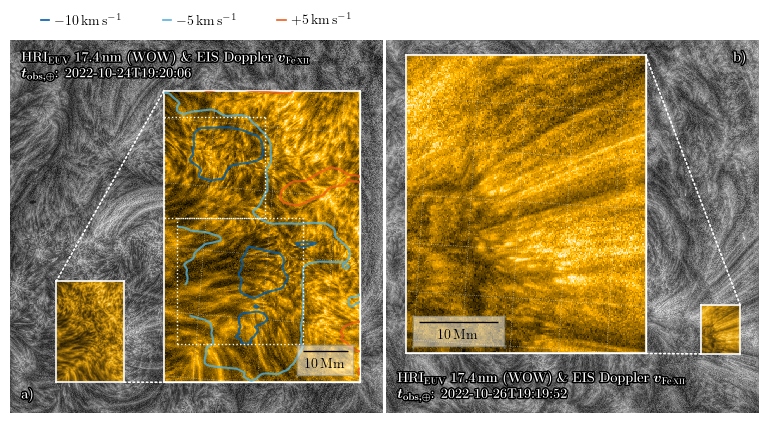

In [16]:
fig = plt.figure(figsize=(8*0.94,4.5*0.94),layout='constrained')

ax1 = fig.add_subplot(121, projection=hri_map_1024)

hri_map_1024_wow.plot(norm=ImageNormalize(),cmap='grey',title=False,
                      axes=ax1)

ax1.imshow(hri_map_1024_wow_colorful, origin='lower', alpha=0.9)

ax1_zoomin = ax1.inset_axes([0.4,140/1700,0.55,0.78], projection=hri_map_1024_wow_zoomin,
                            transform=ax1.transAxes)

hri_map_1024_wow_zoomin.plot(norm=ImageNormalize(),title=False,axes=ax1_zoomin,cmap='sdoaia171',
                             )

ax1_zoomin_bounds = ax1_zoomin.axis()
cs = eis_195_velmap_derot_repro_hrifov_1024.draw_contours(levels=[-10,-5,5,10],colors=["#005CAF","#58B2DC","#F05E1C","#E83015"],
                                                     alpha=0.8,axes=ax1_zoomin)
legend_artist = [plt.Line2D([0],[0], color="#005CAF", lw=1.2),
                 plt.Line2D([0],[0], color="#58B2DC", lw=1.2),
                 plt.Line2D([0],[0], color="#F05E1C", lw=1.2),]
legend_labels = [r'$-10\,\mathrm{km\,s^{-1}}$',r'$-5\,\mathrm{km\,s^{-1}}$',r'$+5\,\mathrm{km\,s^{-1}}$']
ax1.legend(legend_artist,legend_labels,bbox_to_anchor=(0.05, 1.0, 0.9, 0.1), frameon=False,fontsize=10,
           mode='expand', ncol=3, handlelength=0.6,handletextpad=0.4)

ax1_zoomin.axis(ax1_zoomin_bounds)

for edge in hri_map_1024_wow_zoomin_edges:
    edge_x, edge_y = edge.T.to_value(u.pix)
    ax1.plot(edge_x + 210, edge_y + 140, lw=1.2, color='white')

for edge in hri_map_1024_wow_zoomin_region_1_edges:
    edge_x, edge_y = edge.T.to_value(u.pix)
    ax1_zoomin.plot(edge_x + 210 - 210, edge_y + 400 - 140, 
                    lw=1.0, color='white', ls=':')

for edge in hri_map_1024_wow_zoomin_region_2_edges:
    edge_x, edge_y = edge.T.to_value(u.pix)
    ax1_zoomin.plot(edge_x + 230 - 210, edge_y + 200 - 140, 
                    lw=1.0, color='white', ls=':')



connect_patch_0 = patches.ConnectionPatch(xyA=(520, 140), xyB=(0,0),
        coordsA="data", coordsB="axes fraction",axesA=ax1, axesB=ax1_zoomin, color="white",
        zorder=2,lw=1.2,ls=':')

connect_patch_1 = patches.ConnectionPatch(xyA=(210, 600), xyB=(0,1),
        coordsA="data", coordsB="axes fraction",axesA=ax1, axesB=ax1_zoomin, color="white",
        zorder=2,lw=1.2,ls=':')

# connect_patch_2 = patches.ConnectionPatch(xyA=(520, 600), xyB=(1,1),
#         coordsA="data", coordsB="axes fraction",axesA=ax1, axesB=ax1_zoomin, color="white",
#         zorder=2,lw=1.2,ls=':')

for patch_ in (connect_patch_0, connect_patch_1,):
    fig.add_artist(patch_)

ax1_zoomin.coords[0].set_ticklabel_visible(False)
ax1_zoomin.coords[1].set_ticklabel_visible(False)
ax1_zoomin.coords[0].set_ticks(color='white')
ax1_zoomin.coords[1].set_ticks(color='white')
ax1_zoomin.coords[0].frame._color = 'white'

ax1.text(0.03,0.97,r'\textbf{HRI\textsubscript{EUV} 17.4\,nm (WOW)} '
         r'\textbf{\& EIS Doppler} $\boldsymbol{v}_{\textbf{Fe\,\textsc{xii}}}$' + '\n'
         r'$\boldsymbol{{t_{{\mathrm{{obs}},\oplus}}}}$\textbf{{: {}}}'.format(hri_map_1024_wow.meta['date_ear'][:-4]),
         fontsize=10,transform=ax1.transAxes,va='top',ha='left',color='white', linespacing=1.3,
         path_effects=[path_effects.Stroke(linewidth=2, foreground='black'),path_effects.Normal()])

ax1.text(0.03,0.03,r'\textbf{a)}',fontsize=10,transform=ax1.transAxes,va='bottom',ha='left',color='white',
         path_effects=[path_effects.Stroke(linewidth=2, foreground='black'),path_effects.Normal()])

ax1.axis("off")
ax1_zoomin.coords[0].set_ticks_visible(False)
ax1_zoomin.coords[1].set_ticks_visible(False)

wcs_scalebar(ax1_zoomin, length=10*u.Mm, color='black', label=r'10\,Mm', corner='bottom right', borderpad=0.4,
                 frame=True,bbox_props=dict(boxstyle='round,pad=-0.1',facecolor='white', edgecolor='#91989F', alpha=0.5),
                 )


ax2 = fig.add_subplot(122, projection=hri_map_1026_wow)
im4 = hri_map_1026_wow.plot(norm=ImageNormalize(),cmap='grey',title=False,axes=ax2)

ax2.imshow(hri_map_1026_wow_colorful, origin='lower', alpha=0.9)

ax2_zoomin = ax2.inset_axes([0.05,295/1848,0.65,0.8], projection=hri_map_1026_wow_zoomin,
                            transform=ax2.transAxes)

hri_map_1026_wow_zoomin.plot(norm=ImageNormalize(),title=False,axes=ax2_zoomin,cmap='sdoaia171')

ax2_zoomin_bounds = ax2_zoomin.axis()
for edge in hri_map_1026_wow_zoomin_edges:
    edge_x, edge_y = edge.T.to_value(u.pix)
    ax2.plot(edge_x + 1600, edge_y + 300, lw=1.2, color='white')

connect_patch_2 = patches.ConnectionPatch(xyA=(1600, 300), xyB=(1,0),
        coordsA="data", coordsB="axes fraction",axesA=ax2, axesB=ax2_zoomin, color="white",
        zorder=2,lw=1.2,ls=':')

connect_patch_3 = patches.ConnectionPatch(xyA=(1800, 550), xyB=(1,1),
        coordsA="data", coordsB="axes fraction",axesA=ax2, axesB=ax2_zoomin, color="white",
        zorder=2,lw=1.2,ls=':')

for patch_ in (connect_patch_2, connect_patch_3,):
    fig.add_artist(patch_)

ax2_zoomin.coords[0].set_ticklabel_visible(False)
ax2_zoomin.coords[1].set_ticklabel_visible(False)
ax2_zoomin.coords[0].set_ticks(color='white')
ax2_zoomin.coords[1].set_ticks(color='white')
ax2_zoomin.coords[0].frame._color = 'white'

ax2.text(0.03,0.03,r'\textbf{HRI\textsubscript{EUV} 17.4\,nm (WOW)} '
            r'\textbf{\& EIS Doppler} $\boldsymbol{v}_{\textbf{Fe\,\textsc{xii}}}$' + '\n'
            r'$\boldsymbol{{t_{{\mathrm{{obs}},\oplus}}}}$\textbf{{: {}}}'.format(hri_map_1026_wow.meta['date_ear'][:-4]),
            fontsize=10,transform=ax2.transAxes,va='bottom',ha='left',color='white', linespacing=1.3,
            path_effects=[path_effects.Stroke(linewidth=2, foreground='black'),path_effects.Normal()])

ax2.text(0.97,0.97,r'\textbf{b)}',fontsize=10,transform=ax2.transAxes,va='top',ha='right',color='white',
            path_effects=[path_effects.Stroke(linewidth=2, foreground='black'),path_effects.Normal()])

ax2.axis("off")
ax2_zoomin.coords[0].set_ticks_visible(False)
ax2_zoomin.coords[1].set_ticks_visible(False)

wcs_scalebar(ax2_zoomin, length=10*u.Mm, color='black', label=r'10\,Mm', corner='bottom left', borderpad=0.4,
                    frame=True,bbox_props=dict(boxstyle='round,pad=-0.1',facecolor='white', edgecolor='#91989F', alpha=0.5),
                    )

fig.get_layout_engine().set(wspace=0, w_pad=1/72)
fig.savefig("../../figs/test_figs/hri_zoomin_karbacher.pdf", dpi=300, bbox_inches='tight')